# Decision Trees with Sklearn

© Explore Data Science Academy

## Learning Objectives
In this train you will learn how to:

- Understand Decision Tree Models for Regression; and
- Build a Decision Tree using Sklearn.

## Outline
This train is structured as follows:

- How Decision Trees Work;
- Training a Decision Tree; and
- Implementing Decision Trees using scikit-learn.


## Introduction: How Decision Trees Work

Before we build our first tree, it is worth learning a bit about _what_ they are and _how_ they work. Below is a diagram showing the conceptual structure of a decision tree.

<img src="https://github.com/Explore-AI/Pictures/blob/master/decision_tree_diag.png?raw=true" alt="Decision Tree Diagram" align="left" width=50%/>


In simple terms, Decision Trees are tree-like (upside down) machine learning models which represent data by partitioning it into different sections based on questions asked of predictive variables in the data. 

To make a decision on a new input:

1. We start at the **root node**, which is at the top of the tree;
2. Ask questions at each **decision node** about the attributes of the input;
3. Repeat 2. until we reach a **terminal node** (also known as a leaf node) at the bottom of the upside-down tree.


Each terminal node in the tree contains a potential output (i.e. $Y$ value) for a given input $X$. The $Y$ value at a terminal node only becomes the output of our decision tree if the path of decisions on an input $X$ from the root node lead to that particular terminal node.

### Example

Consider the following example of a new datapoint $X$ with a value of 4.5. If we wanted to predict the $Y$ value for this new datapoint, the path that the input would follow along the decision tree is shown in green below:

<img src="https://github.com/Explore-AI/Pictures/blob/master/decision_tree_path.png?raw=true" alt="Decision Tree Diagram" align="left" width=50%/> 

The new datapoint would follow the path highlighted in green shown above and would eventually be assigned a value of $Y = 2$.   

Okay great, so we now know how to _use_ a decision tree. But where did the values of the split points come from, and how do we know how many 'branches' the tree should have?

## Training a Decision Tree
In the decision process, datapoints start at the root node and end at a terminal node. The training process follows the same pattern.   

In training a decision tree, we begin with all of our training data at the root node and then partition the data into smaller subsets which form the 'branches' of the tree.   

When partitioning the data, two questions need to be answered:

1. Which predictor variable should be used as the split criterion?

2. What value of the predictor variable should be used as the splitting point?

### Partitioning

Partitioning happens at each node in a regression tree using an algorithm known as **recursive binary splitting** which uses the following logic:

1. **For** each predictor variable **do**: 

    1.1. Consider all possible binary data splits, i.e.: 
    
    (the following table is written in Python slicing syntax. For example, x[:1], x[2:] implies splitting the variable x between the first and second positions).
    
| Left split             | Right split            |
|------------------------|------------------------|
| x[0]                   | x[1:]                  |
| x[:1]                  | x[2:]                  |
| x[:2]                  | x[3:]                  |
| $  \qquad \huge \dots$ | $  \qquad \huge \dots$ |
| x[:-2]                 | x[-1]                  |
    
   2.1. Select data split with **best** separation of data, as shown in the figure below.
  

<img src="https://github.com/Explore-AI/Pictures/blob/master/splitting_1.png?raw=true" align="left" alt="Decision Tree Diagram" width=50% />

_The best split point is chosen on its ability to separate the data. On either side of the split point (i.e. at a particular value of that predictor variable), all datapoints' $y$ values are compared to the mean $y$ value of that subset and this is used to calculate the **mean squared error** (MSE). The best split point is the one which minimises the MSE on both sides._   

2. Compare the best splits across all predictive variables and pick the **best**;

3. Divide data into 2 subsets based on the selected split;

4. Repeat steps 1-3 for all subsets until some desired ending criteria has been reached.

After a number of splits, the final partitions might look something like the diagram below:

<img src="https://github.com/Explore-AI/Pictures/blob/master/splitting_2.png?raw=true" align="left" alt="Decision Tree Diagram" width=50% />

## Build a Decision Tree using scikit-learn
---
So now that we have an understanding of how decision trees work, let's implement one using scikit-learn.   

Suppose we are tasked with the problem of predicting the price of a house given its area. 

<img src="https://github.com/Explore-AI/Public-Data/blob/master/house_price.png?raw=true" width=40% align="left"/>

We'll start by importing some commonly used Python libraries and loading our data:

In [1]:
import numpy as np  # used for mathematical operations
import pandas as pd  # for loading CSV data
import matplotlib.pyplot as plt  # for plotting data

In [2]:
df = pd.read_csv("https://github.com/Explore-AI/Public-Data/blob/master/house_price_by_area.csv?raw=true")
df.head()

,LotArea,SalePrice
0,138,1204000
1,145,1274000
2,152,1673000
3,152,1232000
4,152,1195600


The data we will be working with here consists of two variables:
 * `LotArea` in m$^{2}$
 * `SalePrice` in Rands
 
We will be using the value of `LotArea` (independent variable) to try and predict the `SalePrice` (dependent variable).   

Let's take a look at the data using `matplotlib`:

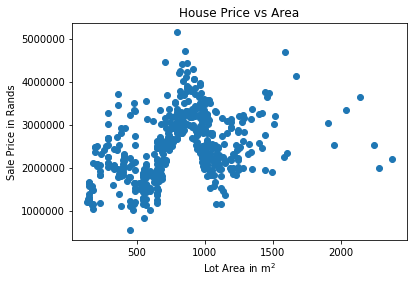

In [3]:
X = df["LotArea"] # independent variable
y = df["SalePrice"] # dependent variable

plt.scatter(X,y) # create scatter plot
plt.title("House Price vs Area")
plt.xlabel("Lot Area in m$^2$")
plt.ylabel("Sale Price in Rands")
plt.show()

### Train-test split
Next we split out dataset into training and testing sets so that we can later evaluate the performance of model.

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
# set test size to 20 % of training data
x_train, x_test, y_train, y_test = train_test_split(X[:,np.newaxis],y,test_size=0.2,random_state=42)

### Building the Decision Tree

In [6]:
from sklearn.tree import DecisionTreeRegressor

After importing our Decision Tree Regressor model, we have to instantiate the model. This step also allows us to set model hyperparameters such as:

- **max_depth**: The maximum depth of the tree (i.e. the number of nodes between root and leaf node);
- **criterion**: The function to measure the quality of a split. The model uses the Mean Square Error (mse) by default;
- **random_state**: A number used to seed the random number generator. Ensures that we get the same tree each time we call model.fit(); among other hyperparameters.

To learn more about other DecisionTreeRegressor hyperparameters, run `help(DecisionTreeRegressor)` in a new cell.

In [7]:
# Instantiate regression tree model
regr_tree = DecisionTreeRegressor(max_depth=2,random_state=42)

As with most Sklearn models, we call the `.fit()` to train our model.

In [8]:
regr_tree.fit(x_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

`sklearn` recently implemented a neat feature for the visualisaton of a fitted tree. We can access it by importing the `plot_tree` method from the the `sklearn.tree` submodule. Take note of the split points for the `LotArea` variable, as well as the MSE values and the number of samples in each subset.

In [9]:
from sklearn.tree import plot_tree

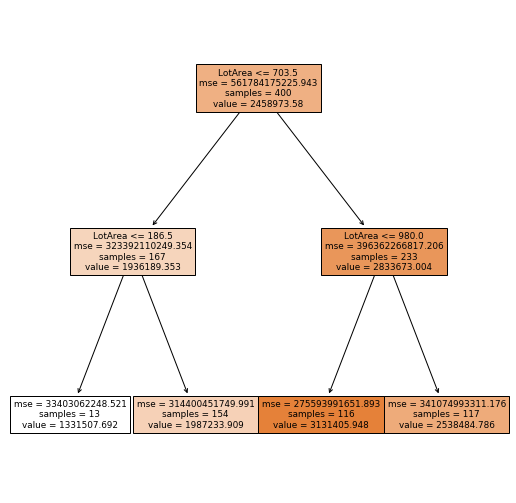

In [10]:
plt.figure(figsize=(9,9))
# assigned a random variable name to the plot to suppress text output
_ = plot_tree(regr_tree, feature_names=['LotArea'],  filled=True)

At this point, we have a fully-trained decision tree model and can easily make predictions by calling the `.predict` method.

### Evaluating Model Performance

In [11]:
from sklearn.metrics import mean_squared_error

We evaluate model performance by calculating how close its predictions on the unseen `x_test` observations are to the actual output `y_test`.

In [12]:
# get predictions for test data
y_pred = regr_tree.predict(x_test)

# calculate MSE
MSE = mean_squared_error(y_pred,y_test)

# Report RMSE
print("Regression Decision Tree model RMSE is:",np.sqrt(MSE))

Regression Decision Tree model RMSE is: 625573.2843752672


### Visualising Model Output

One way to visualise a regression decision tree model is to ask it for predictions $\hat{y}$ on a given domain $x$ and then plot the resulting line.
In this case, we let our domain be a set of equidistant points on the $x$-axis starting from the minimum $x$-value in the data to the maximum $x$-value in the data.

In [13]:
x_domain = np.linspace(min(X), max(X), 100)[:, np.newaxis] 

In [14]:
# predict y for every point in x-domain
y_predictions = regr_tree.predict(x_domain)

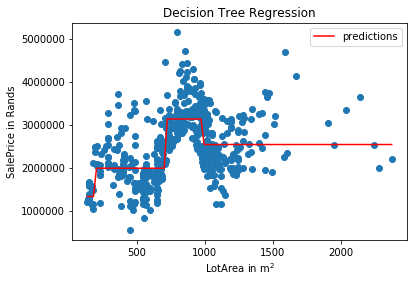

In [15]:
# plot the regression tree line over data
plt.figure()
plt.scatter(X, y)
plt.plot(x_domain, y_predictions, color="red", label='predictions')
plt.xlabel("LotArea in m$^2$")
plt.ylabel("SalePrice in Rands")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

### Exercise

In your own time, and consulting the trains we have already covered, we encourage you to attempt the following:

1. Fit a Linear regression model using the given data i.e. (x_train, y_train);
2. Calculate the RMSE performance metric for your linear regression model and compare with the RMSE for the decision tree obtained above;
3. Plot the linear regression model, decision tree, and data in the same matplotlib figure.

### Advantages and Disadvantages of Decision trees

Advantages:

- Easy to use and understand
- Can handle both categorical and numerical data
- Resistant to outliers, requires little data preprocessing
- New features can be easily added - Can be used to build larger classifiers by using ensemble methods

Disadvantages:

- Prone to overfitting
- Need to be careful with parameter tuning - Can create biased learned trees if some classes dominate.

## Conclusion
In this train we learned the fundamentals of decision trees. How to build a decision tree using Sklearn. We also learned how to use decision trees for regression.


## Additional links
Links to additional resources to help with the understanding of concepts presented in the train: 

- [Regression Trees StatQuest](https://youtu.be/g9c66TUylZ4)